# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

by : Y NOAH RAPHAEL DAVID

In [101]:
#importing required packages

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [103]:
#importing datasets

In [104]:
data = pd.read_csv('Iris.csv')

In [105]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
#EDA

In [106]:
data.shape

(150, 6)

In [107]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [109]:
#checking for NULL values

In [110]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [111]:
#checking for outliers

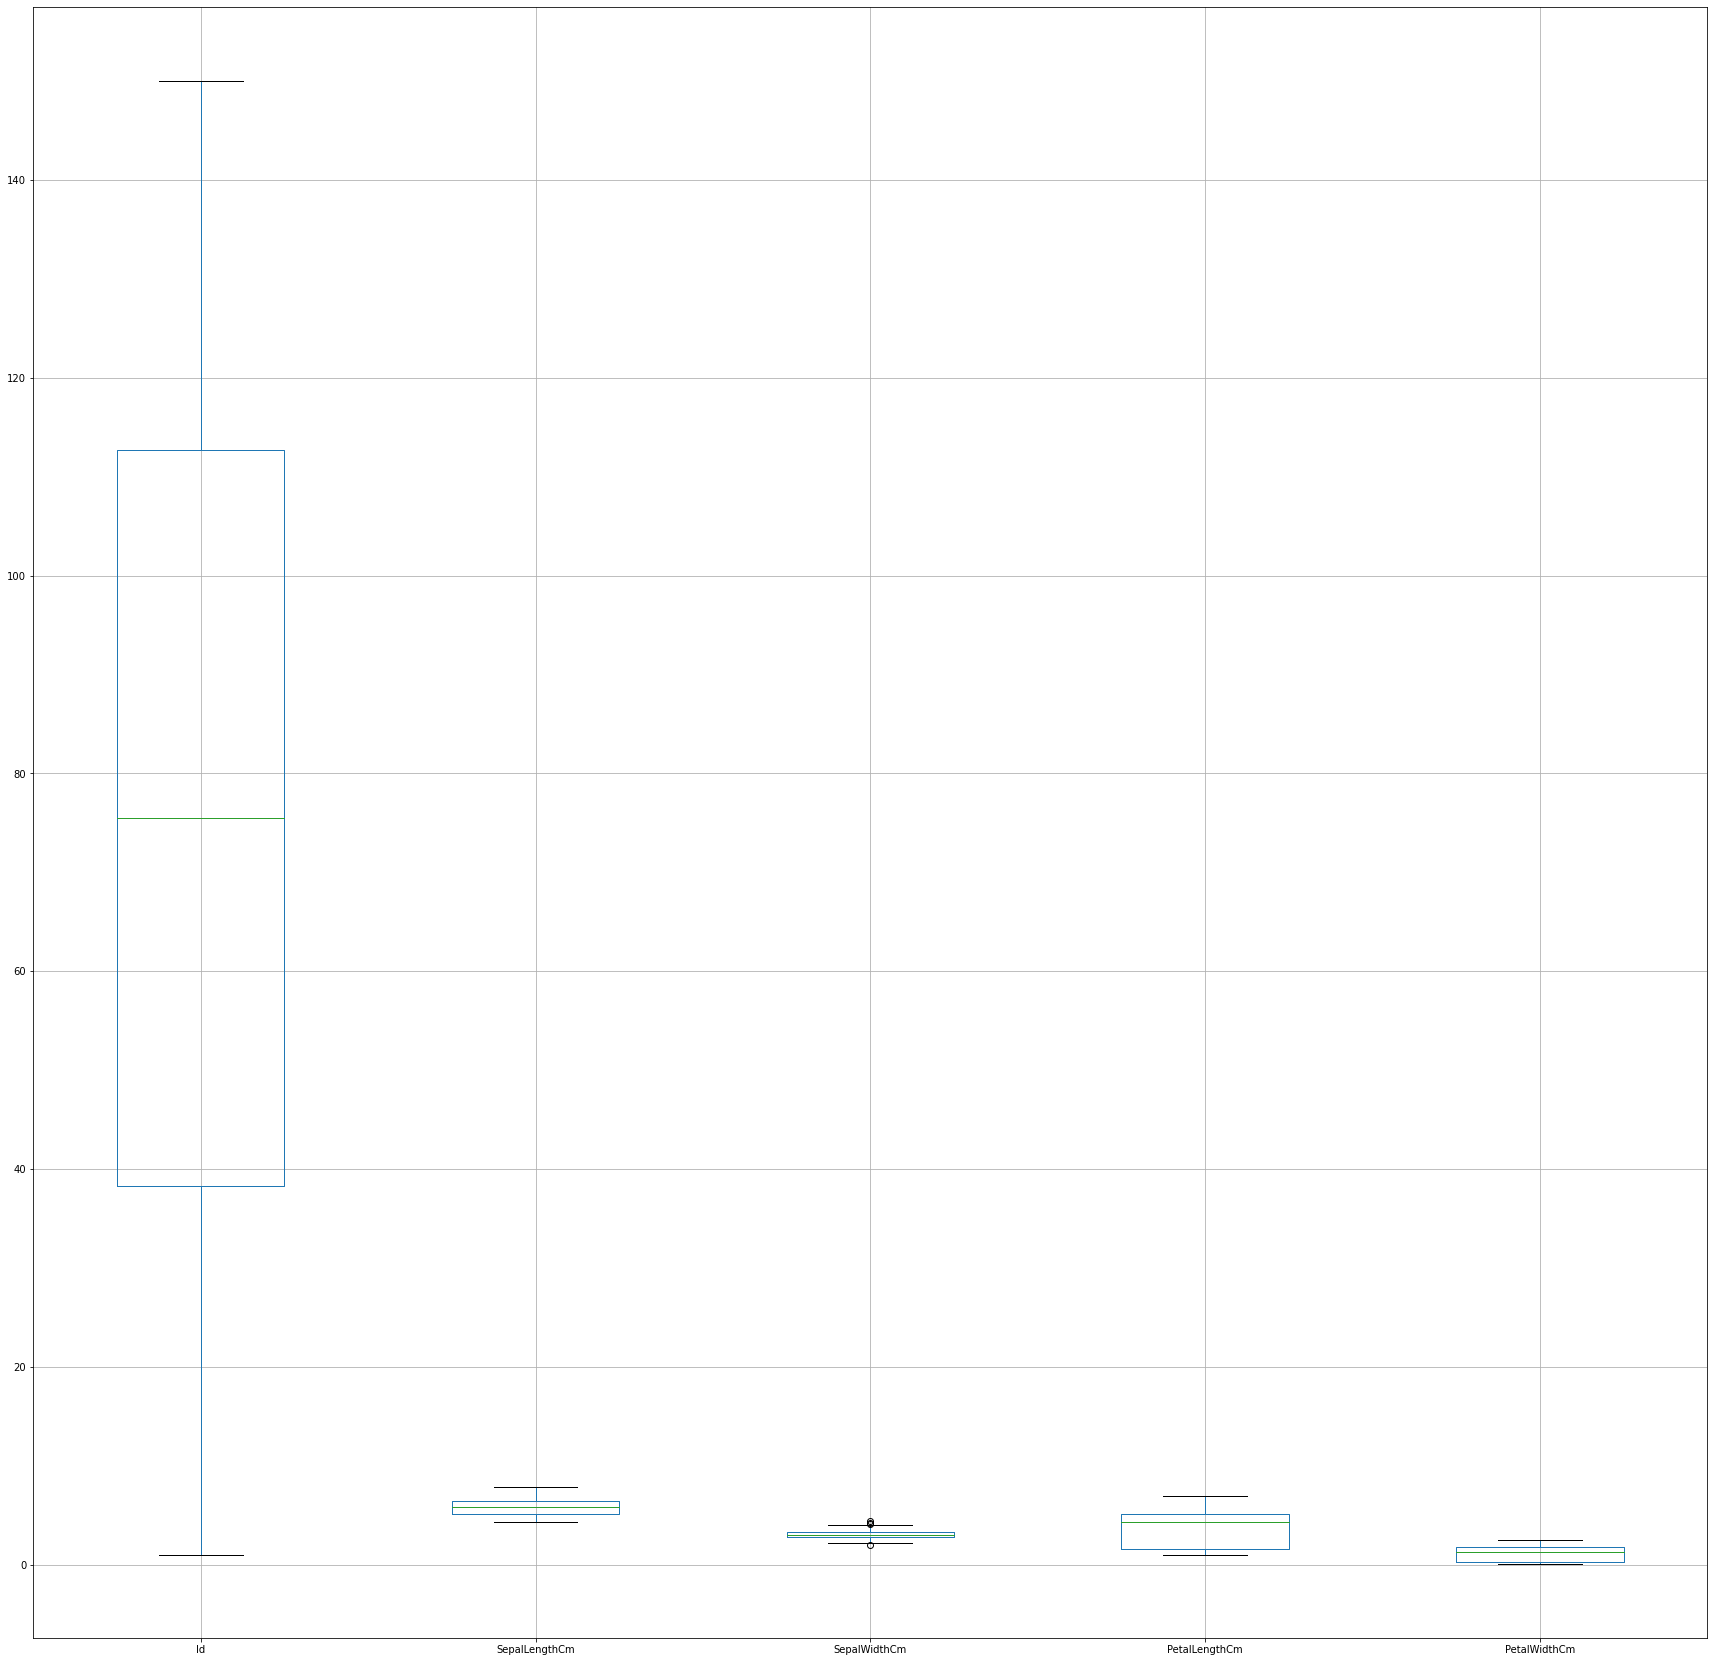

In [112]:
data.boxplot(figsize=(30,30));

In [113]:
def remove_outliers(col):
    sorted(col)
    Q3,Q1 = np.percentile(col,[75,25])
    IQR = Q3-Q1
    uplimit = (1.5*IQR)+Q3
    lwlimit = (1.5*IQR)-Q1
    return uplimit,lwlimit

In [114]:
uplevel,lowlevel=remove_outliers(data['SepalWidthCm'])
data['SepalWidthCm']=np.where(data['SepalWidthCm']>uplevel,uptenure,data['SepalWidthCm'])
data['SepalWidthCm']=np.where(data['SepalWidthCm']<lowlevel,0,data['SepalWidthCm'])

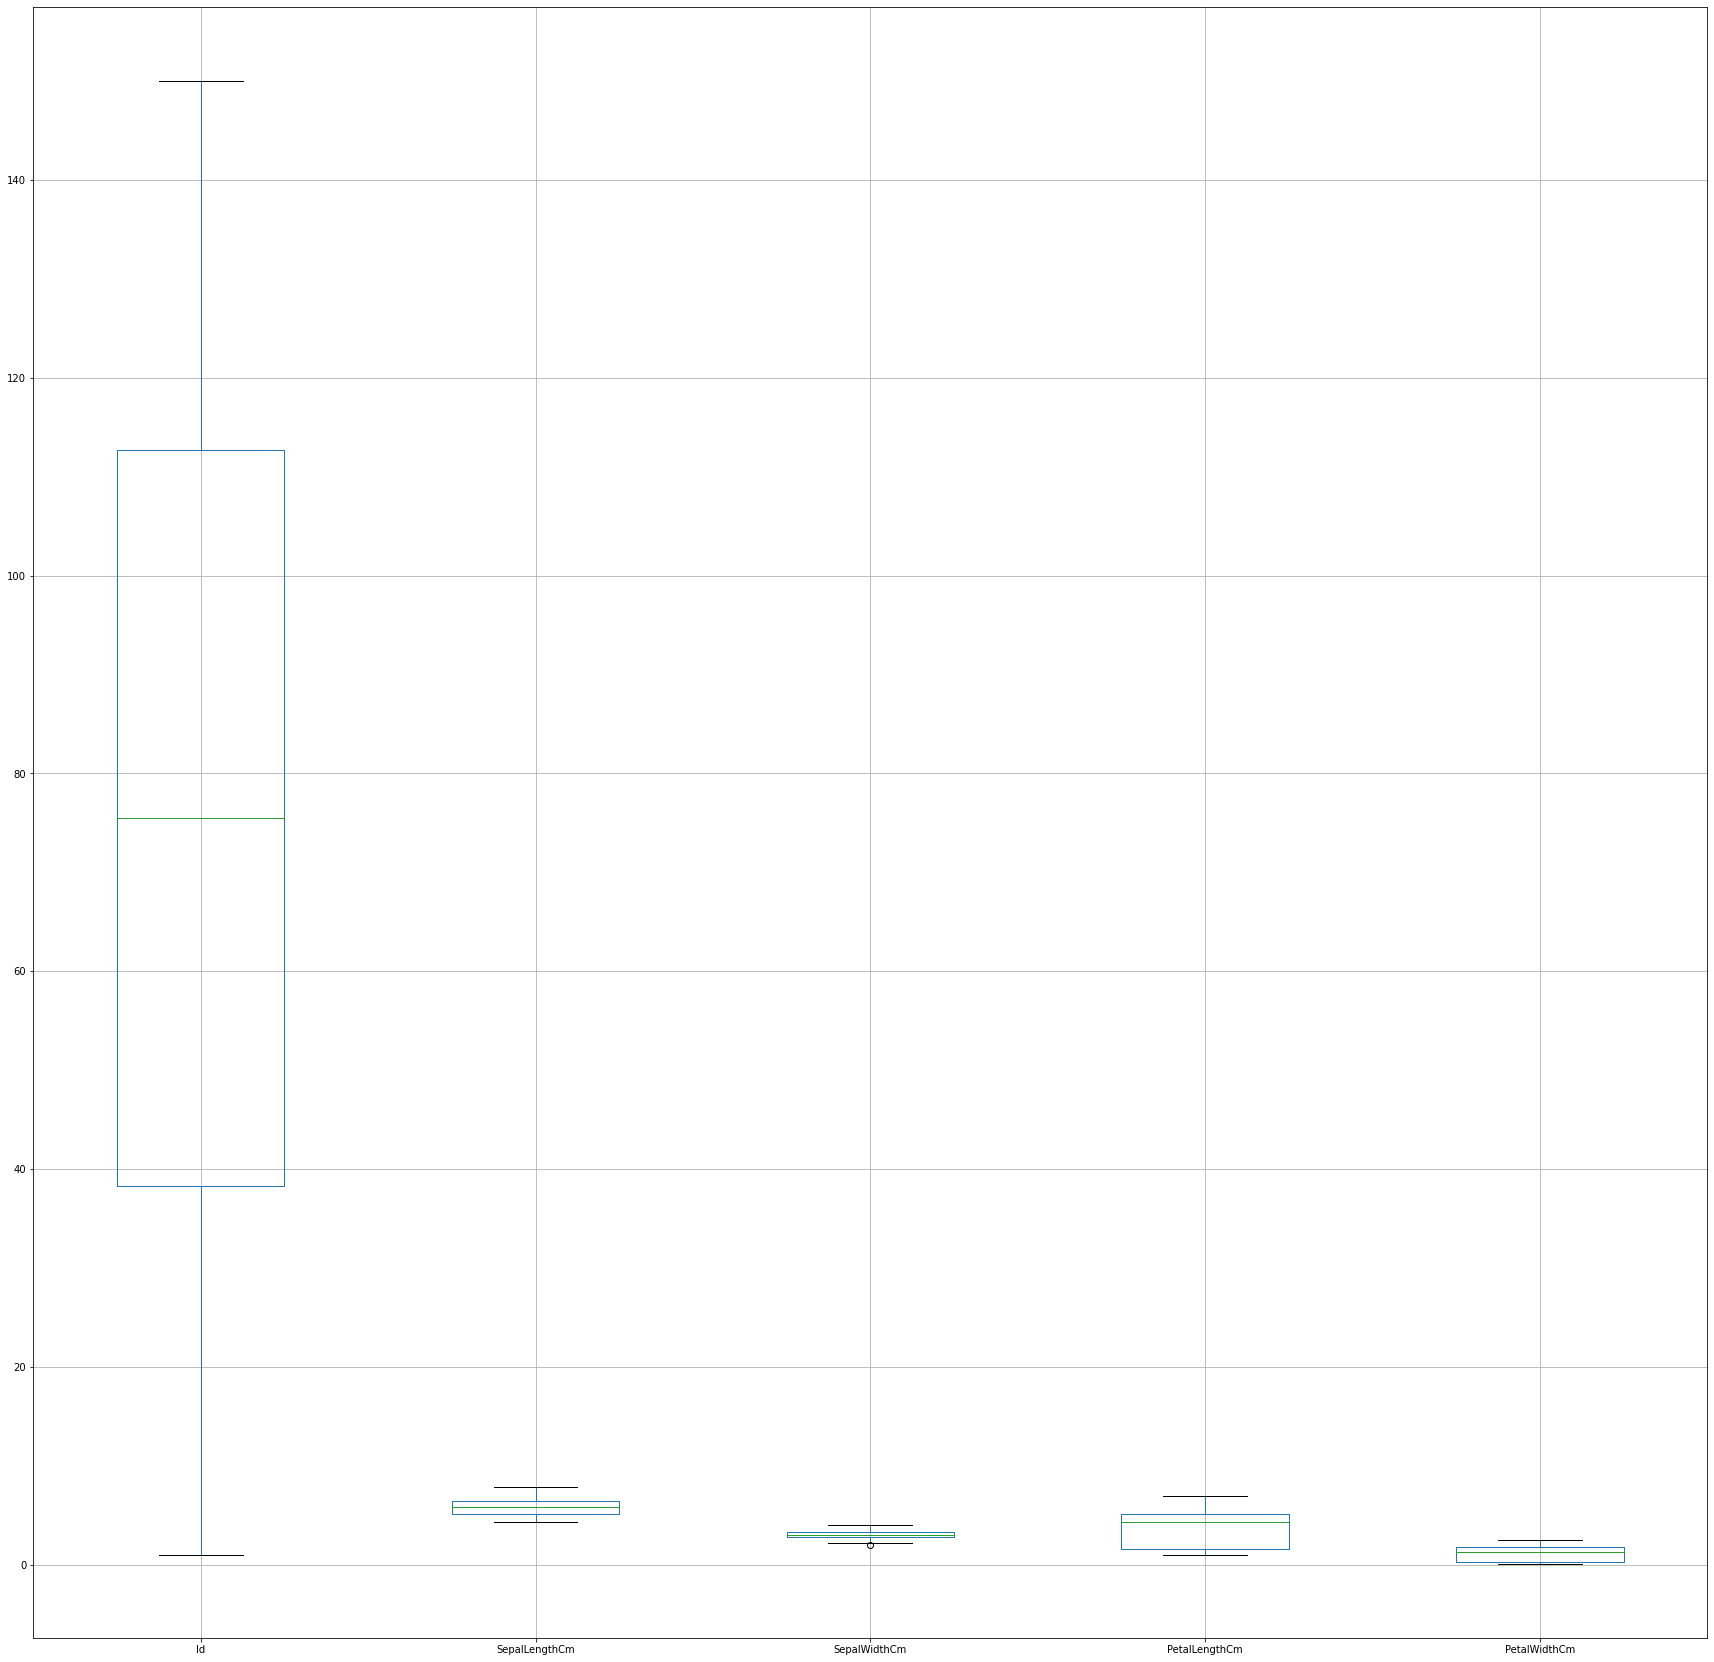

In [115]:
data.boxplot(figsize=(30,30));

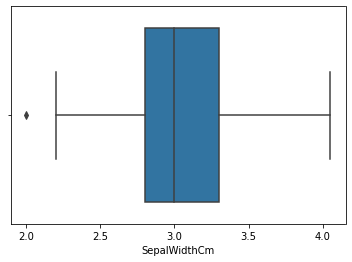

In [116]:
sns.boxplot(x=data["SepalWidthCm"])

In [117]:
lowlevel

-2.05

In [118]:
data["SepalWidthCm"].min()

2.0

In [119]:
data['SepalWidthCm']=np.where(data['SepalWidthCm']==2,2.2,data['SepalWidthCm'])

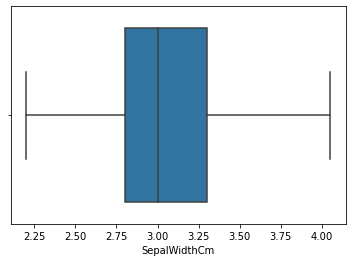

In [120]:
sns.boxplot(x=data["SepalWidthCm"])

In [121]:
#DATA VISUALIZATION

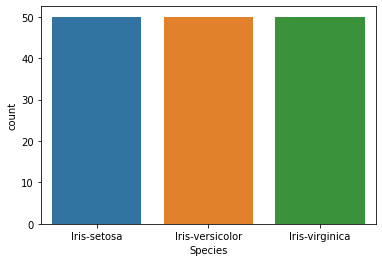

In [122]:
sns.countplot(data['Species'])

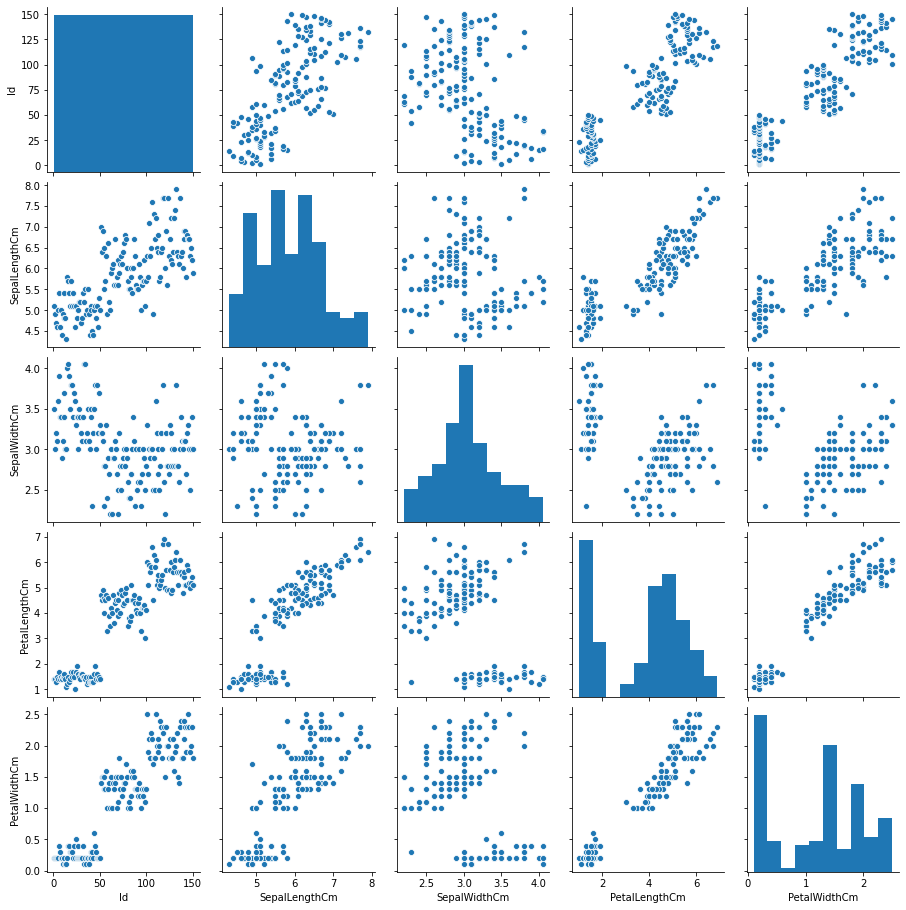

In [123]:
sns.pairplot(data=data)

In [124]:
#ELBOW GRAPH

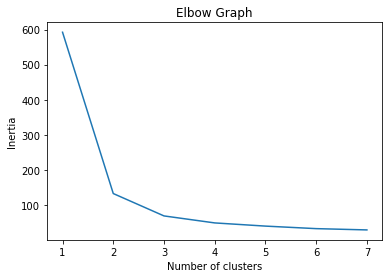

In [125]:
x = data.iloc[:, [1, 2, 3]].values
inertias = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 8), inertias)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [126]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [127]:
#predict the cluster labels
labels = kmeans.predict(x)

In [128]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

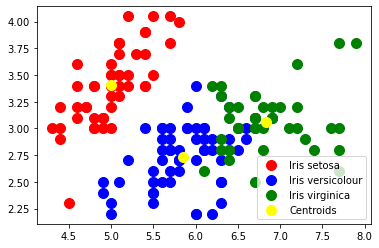

In [129]:
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [130]:
Species = ['Iris-setosa', 'Iris-versicolour','Iris-virginica']
Species_ = []
for i in labels:
    Species_.append(Species[i])

In [131]:
Species_

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolour',
 'Iris-virginica',
 'Iris-versicolour',
 'Iris-versicolour',
 'Iris-versicolour',
 'Iris-versicolour',
 'Iris-versicolour',
 'Iris-versicolour',
 'Iris-versicol

In [132]:
data['Predicted_Species'] = Species_

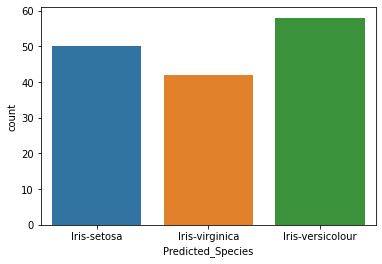

In [133]:
sns.countplot(data['Predicted_Species'])
